In [1]:
eqfile = "/mnt/scratch1/hirak/RapCompressData/sailfish/sailfish_quant/aux/eq_classes.txt"
serialReadID = "/mnt/scratch1/hirak/RapCompressData/sailfish/sailfish_quant/aux/serialreadID.txt"
eq2readInfo = "/mnt/scratch1/hirak/RapCompressData/sailfish/sailfish_quant/aux/eq2readID.txt"

In [12]:
tnames = []
readSeqs = []
with open(serialReadID,'w') as wfile:
    with open(eqfile,'r') as ifile:
        numTran = int(ifile.readline().rstrip())
        numEq = int(ifile.readline().rstrip())
        for i in xrange(numTran):
            tnames.append(ifile.readline().rstrip())
        print("file: {}; # tran = {}; # eq = {}".format(eqfile, numTran, numEq))
        for i in xrange(numEq):
            tok = map(str, ifile.readline().rstrip().split('\t'))
            nt = int(tok[0])
            readnames = tuple(tok[int(nt)+2:-1])
            for rid in readnames:
                print >>wfile,rid
            readSeqs.append(readnames)

file: /mnt/scratch1/hirak/RapCompressData/sailfish/sailfish_quant/aux/eq_classes.txt; # tran = 86331; # eq = 75568


In [13]:
with open(eq2readInfo,'w') as wfile:
    with open(eqfile,'r') as ifile:
        numTran = int(ifile.readline().rstrip())
        numEq = int(ifile.readline().rstrip())
        for i in xrange(numTran):
            ifile.readline()
        print("file: {}; # tran = {}; # eq = {}".format(eqfile, numTran, numEq))
        for i in xrange(numEq):
            tok = map(str, ifile.readline().rstrip().split('\t'))
            nt = int(tok[0])
            readnames = tuple(tok[int(nt)+2:-1])
            print>>wfile,i
            print>>wfile,len(readnames)
            for rid in readnames:
                print >>wfile,rid

file: /mnt/scratch1/hirak/RapCompressData/sailfish/sailfish_quant/aux/eq_classes.txt; # tran = 86331; # eq = 75568


In [13]:
f1 = "/mnt/scratch1/hirak/RapCompressData/flux/reads/r1.fq"

In [7]:
tok

['3',
 '39841',
 '63551',
 '76149',
 '1',
 '4:2071918-2242164C:ENST00000243706:34990:5620:2437:2660:S/1',
 '1']

In [11]:
tok[int(nt)+2:]

['4:2071918-2242164C:ENST00000243706:34990:5620:2437:2660:S/1', '1']

In [7]:
for name,seq,quality

'3'

In [9]:
tok[1:int(nt)+1]

['39841', '63551', '76149']

In [21]:
import uuid

In [27]:
from graph_tool.all import *

In [39]:
graphFile = "/mnt/scratch1/hirak/RapCompressData/gv2.net"
wList = []
import pandas as pd
nf = pd.read_table(graphFile,header=None,sep="\t")

In [61]:
ug = Graph(directed=False)
eWeight = ug.new_edge_property("float")
for _,u,v,_ in nf.itertuples():
    ug.add_edge(u,v)

In [63]:
eWeight.a = nf[2].values

In [ ]:
#find out all the connected component
components,_ = label_components(g,attractors=False)


In [74]:
tree = min_spanning_tree(ug, weights=eWeight)

In [76]:
len(tree.a)

3282462

In [94]:
ug.num_edges

<bound method Graph.num_edges of <Graph object, undirected, with 75568 vertices and 3282462 edges at 0x7f30513401d0>>

In [127]:
import numpy.random as npr
g = random_graph(100, lambda: npr.poisson(2.2), directed=False)
egw = g.new_edge_property("float")
egw.a = npr.random(g.num_edges())
h,a = label_components(g, attractors=True)

117

<Graph object, undirected, with 100 vertices and 117 edges at 0x7f30513ed4d0>

In [113]:
type(nf[2].values)

numpy.ndarray

In [89]:
cdict = {}
seen = set()
for v,ind in enumerate(h.a):
    if not(ind in seen):
        cdict[ind] = v
        seen.add(ind)

In [147]:
vn = {}
import operator
#def find_bfs(v):
    
for comp,v in cdict.iteritems():
    seenv = set()
    print "\n ",v
    go = True
    while(go):
        allN = {e:egw[e] for e in g.vertex(v).all_edges()}
        if len(allN) > 0:
            for _,b in allN.keys():
                seenv.add(b)
            _,n = max(allN.iteritems(), key=operator.itemgetter(1))[0]
        go = False

SyntaxError: invalid syntax (<ipython-input-147-e71b4fac95ba>, line 12)

In [153]:
import networkx as nx

In [154]:
nxG = nx.read_edgelist(graphFile, nodetype=int, data=(('weight',float),))

In [144]:
len(allN)

0

In [103]:
cdict

{0: 0,
 1: 8,
 2: 10,
 3: 22,
 4: 32,
 5: 35,
 6: 39,
 7: 47,
 8: 55,
 9: 68,
 10: 75,
 11: 84,
 12: 97}

In [91]:
tours = {}
for comp,v in cdict.iteritems():
    tour = tsp_tour(g,g.vertex(v))
    tours[comp] = tour

In [93]:
len(tours[0])

87

In [50]:
def readMCLClust(fn):
    fp = open(fn)
    tr_clust = {}
    tr_clust_inv = {}
    key = 1
    for cnum, line in enumerate(fp):
        same_cluster = line.rstrip().split('\t')
        for contig in same_cluster:
            tr_clust[contig] = cnum 
    for k,v in tr_clust.iteritems():
        if v in tr_clust_inv:
            tr_clust_inv[v].append(k)
        else:
            tr_clust_inv[v] = [k]
    return tr_clust, tr_clust_inv

In [51]:
eq_clust, eq_clust_inv = readMCLClust('gv2.clust')

In [54]:
len(eq_clust_inv.keys())

8180

In [55]:
len(eq_clust.keys())

74030

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [15]:
df = pd.read_table("./tmpeq.aux",sep="\t",header=None)

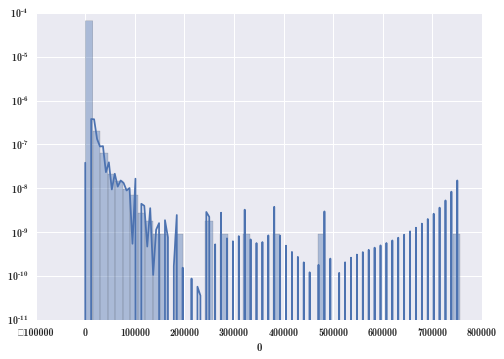

In [36]:
ax = sns.distplot(df[0])
ax.set_yscale('log')

In [38]:
len(df[df[0]>10000])

663